In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Indian automoble buying behavour study 1.0.csv to Indian automoble buying behavour study 1.0.csv


In [9]:
df = pd.read_csv("Indian automoble buying behavour study 1.0.csv")
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [5]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [10]:
df.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
df.rename(columns={'Price':'EV_Price'},inplace=True)
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [11]:
df.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Car_Loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Make', 'EV_Price'],
      dtype='object')

In [14]:
for i in df.columns:
  print(i, ':' , df[i].unique())


Age : [27 35 45 41 31 28 33 34 29 30 49 26 37 36 43 42 32 44 39 46 50 51]
Profession : ['Salaried' 'Business']
Marrital Status : ['Single' 'Married']
Education : ['Post Graduate' 'Graduate']
No of Dependents : [0 2 4 3]
Car_Loan : ['Yes' 'No']
House Loan : ['No' 'Yes']
Wife Working : ['No' 'Yes' 'm']
Salary : [ 800000 1400000 1800000 1600000  900000 1200000 2000000 1300000 2500000
 1700000 1100000 1900000 2100000 2400000 2200000  200000 1500000 2700000
 2900000 3100000 2600000 2300000 2800000 3800000]
Wife Salary : [      0  600000  800000  700000  400000 2000000  500000 1000000 1100000
  900000 1300000 1400000 1800000 2100000]
Total Salary : [ 800000 2000000 1800000 2200000 2600000  900000 1400000 1900000 1700000
 1300000 4500000 2500000 2400000 2900000 1600000 2700000 1100000 2100000
 3000000 3700000 2300000 3600000  200000 3100000 4300000 3800000 4700000
 1200000 1500000 4000000 3200000 5200000 4100000 4900000 2800000 5100000]
Make : ['i20' 'Ciaz' 'Duster' 'City' 'SUV' 'Baleno' 'Ver

In [15]:
#check for null values
df.isnull().sum()

,0
Age,0
Profession,0
Marrital Status,0
Education,0
No of Dependents,0
Car_Loan,0
House Loan,0
Wife Working,0
Salary,0
Wife Salary,0


**Exploratory Data Analysis**



<Axes: xlabel='Age', ylabel='Salary'>

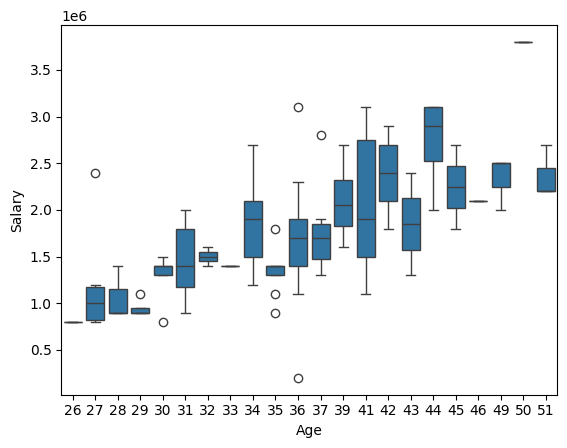

In [18]:
sns.boxplot( x = 'Age' , y= 'Salary', data = df)


In [23]:
print(df.columns.tolist())


['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents', 'Car_Loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary', 'Total Salary', 'Make', 'EV_Price']


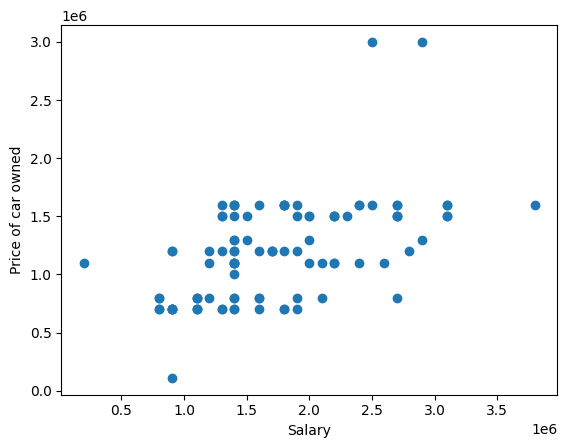

In [24]:


plt.xlabel('Salary')
plt.ylabel('Price of car owned')
plt.scatter(df['Salary'],df['EV_Price'])

In [27]:
print(df.columns.tolist())


['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents', 'Car_Loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary', 'Total Salary', 'Make', 'EV_Price']


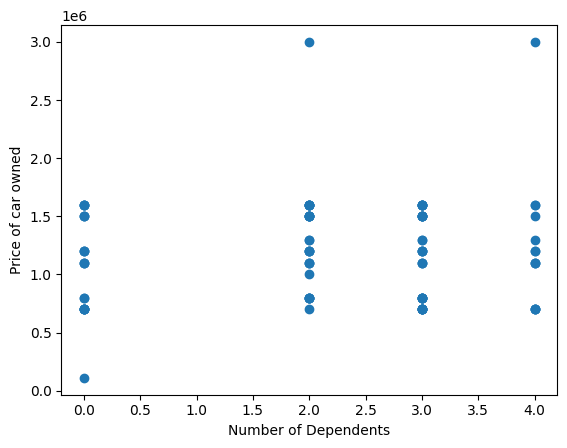

In [28]:

plt.xlabel('Number of Dependents')
plt.ylabel('Price of car owned')
plt.scatter(df['No of Dependents'],df['EV_Price'])

<Figure size 1500x700 with 0 Axes>

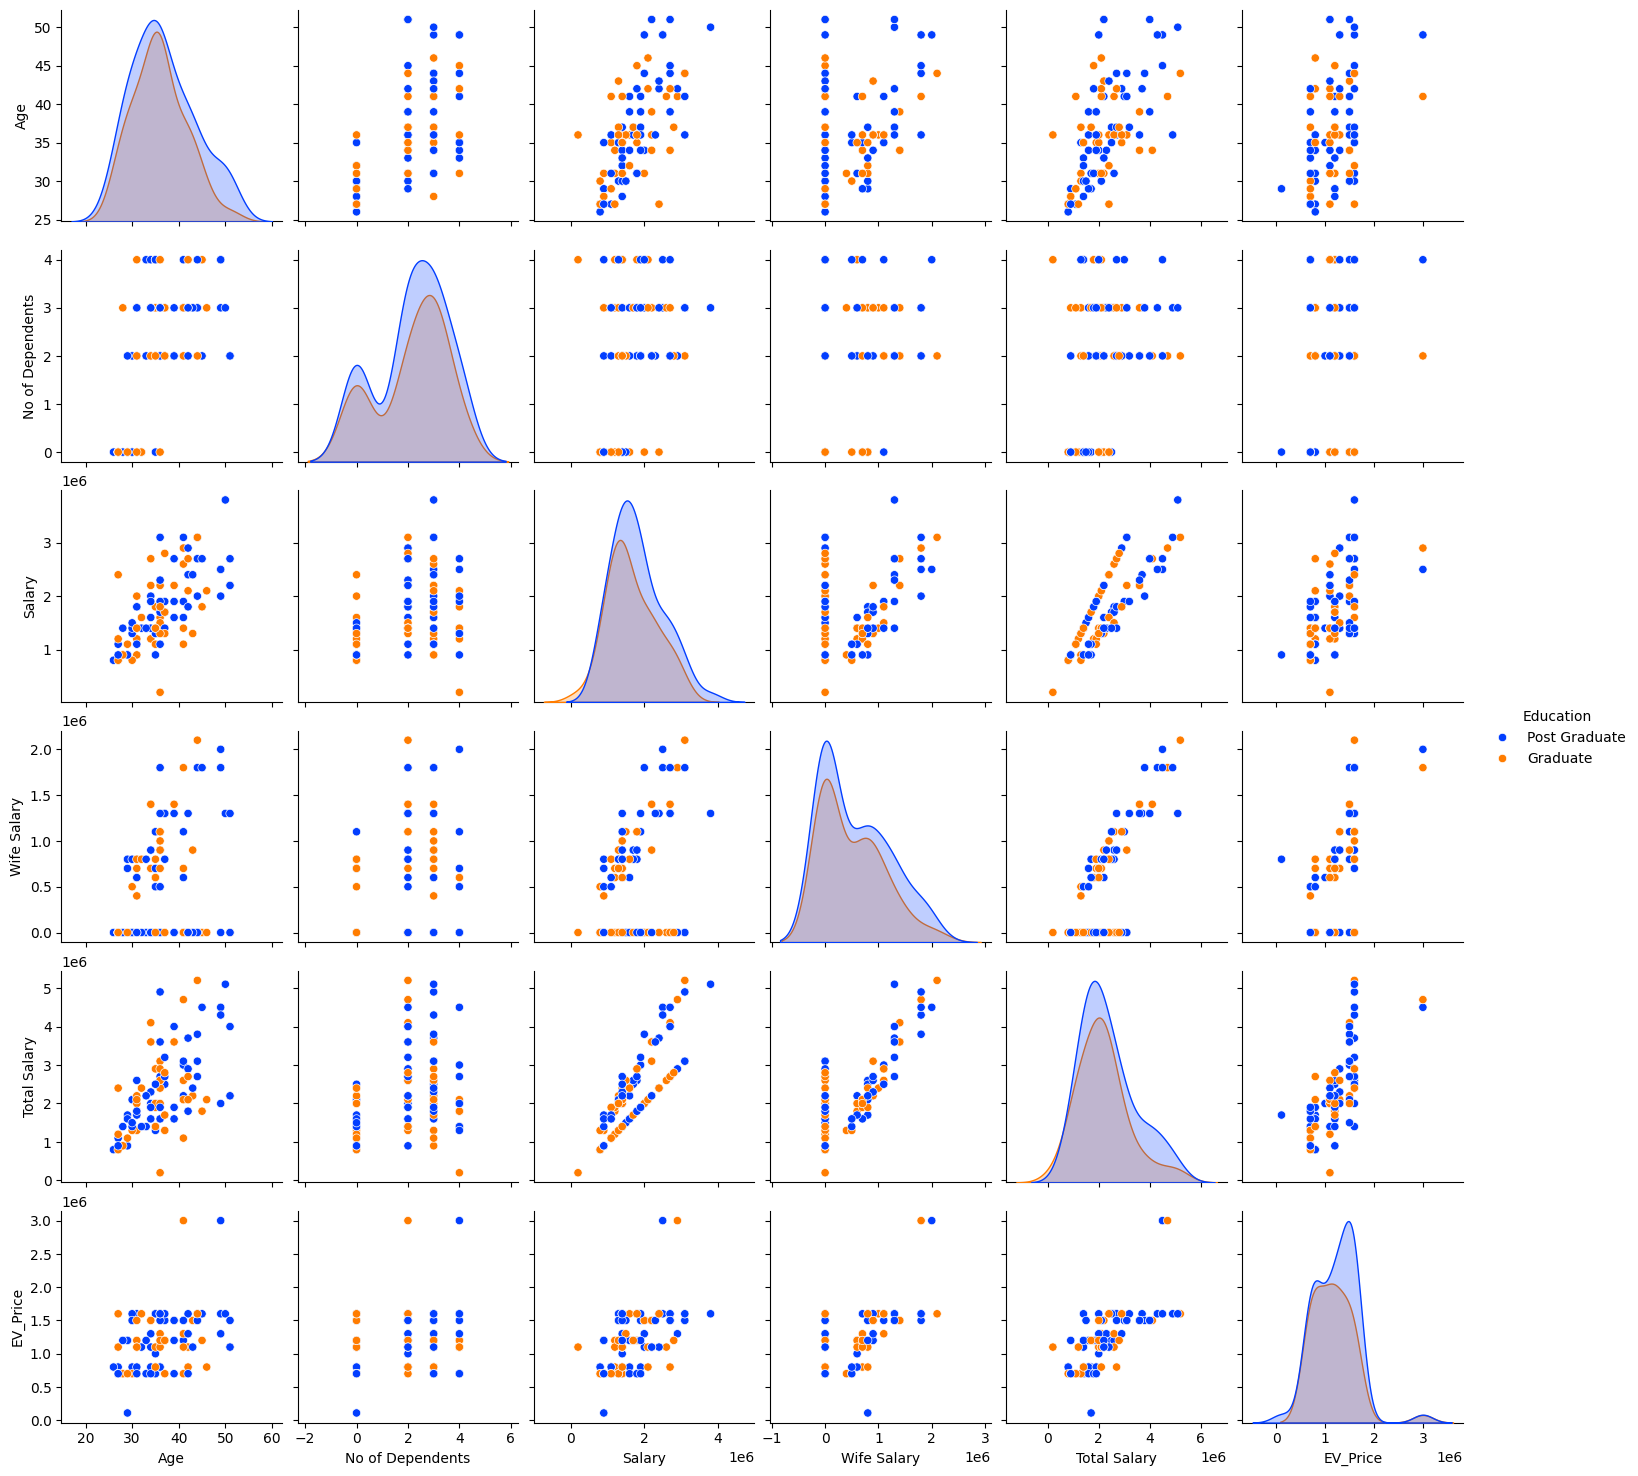

In [29]:
plt.figure(1,figsize=(15,7))
sns.pairplot(df , hue = 'Education', palette = 'bright')

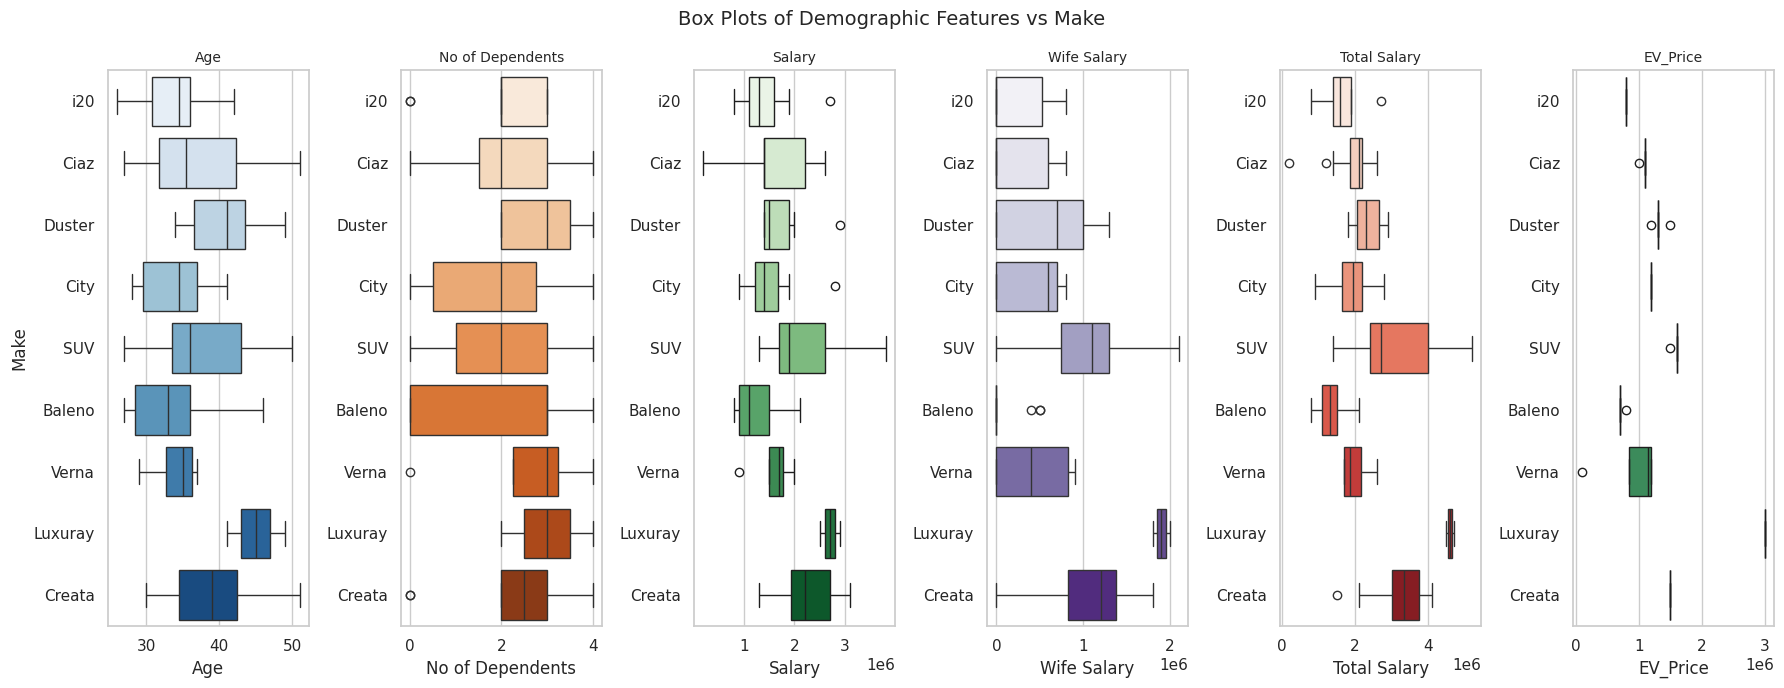

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize=(18, 7))
n = 0


columns = ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'EV_Price']


colors = ['Blues', 'Oranges', 'Greens', 'Purples', 'Reds', 'BuGn']

for cols, color in zip(columns, colors):
    n += 1
    plt.subplot(1, 6, n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.boxplot(x=cols, y='Make', data=df, palette=color)
    plt.ylabel("Make" if n == 1 else '')
    plt.title(cols, fontsize=10)

plt.suptitle('Box Plots of Demographic Features vs Make', fontsize=14)
plt.tight_layout()
plt.show()


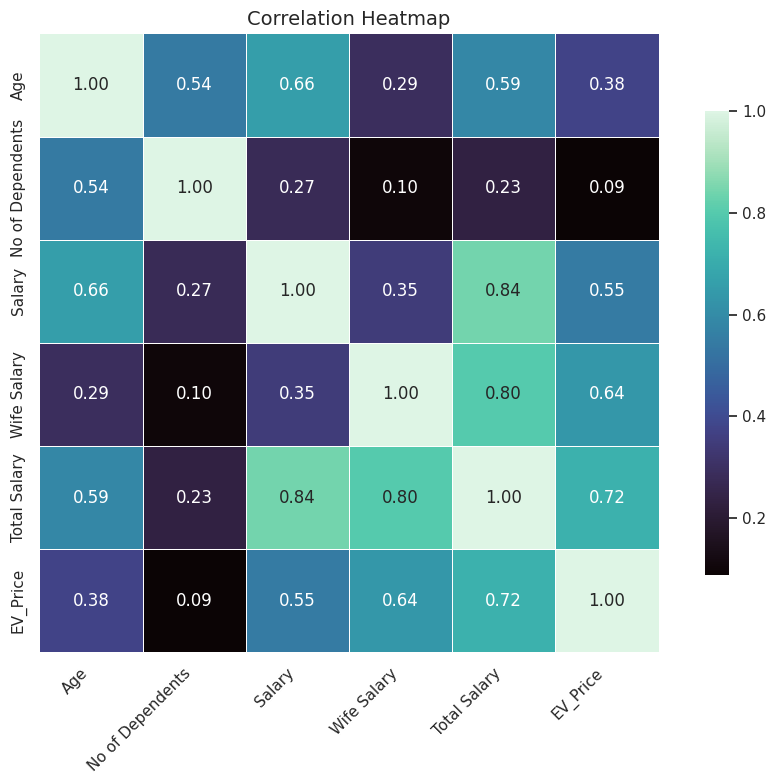

In [35]:

import matplotlib.pyplot as plt
import seaborn as sns


corr = df.corr(numeric_only=True)


plt.figure(figsize=(10, 8))
sns.set(style="white")

heatmap = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='mako',
    square=True,
    cbar_kws={"shrink": 0.75},
    linewidths=0.5,
    linecolor='white'
)


plt.xticks(rotation=45, ha='right')
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()


In [36]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:

df.dtypes

,0
Age,int64
Profession,object
Marrital Status,object
Education,object
No of Dependents,int64
Car_Loan,object
House Loan,object
Wife Working,object
Salary,int64
Wife Salary,int64


In [38]:
dfe = df.iloc[:,df.columns!='Make']
dfe.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,1600000


In [45]:
from sklearn.preprocessing import LabelEncoder

# Make sure you have created a LabelEncoder instance
le = LabelEncoder()

# Apply Label Encoding on multiple categorical columns
dfe['Profession'] = le.fit_transform(dfe['Profession'])
dfe['Marrital Status'] = le.fit_transform(dfe['Marrital Status'])
dfe['Education'] = le.fit_transform(dfe['Education'])
dfe['Car_Loan'] = le.fit_transform(dfe['Car_Loan'])
dfe['House Loan'] = le.fit_transform(dfe['House Loan'])
dfe['Wife Working'] = le.fit_transform(dfe['Wife Working'])


In [46]:
dfe.head()


,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,EV_Price
0,27,1,1,1,0,1,0,0,800000,0,800000,800000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,1200000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,1200000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,1600000


In [47]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [48]:
dfe_scaled = StandardScaler().fit_transform(dfe)
dfe_scaled = pd.DataFrame(dfe_scaled,columns=['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
                                          'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
                                          'Total Salary','Price'])
x = dfe_scaled.to_numpy()
dfe_scaled

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,-1.498630,0.739510,2.366432,0.876275,-1.642313,1.446980,-0.772512,-1.053370,-1.397118,-0.887055,-1.406760,-0.904843
1,-0.211304,0.739510,-0.422577,0.876275,-0.136859,1.446980,1.294479,0.877809,-0.501877,0.108995,-0.258937,-0.445579
2,1.397855,-1.352247,-0.422577,-1.141195,1.368594,1.446980,1.294479,-1.053370,0.094950,-0.887055,-0.450240,0.013685
3,0.754191,-1.352247,-0.422577,0.876275,0.615867,-0.691095,-0.772512,0.877809,-0.203464,0.108995,-0.067633,0.013685
4,-0.854967,0.739510,-0.422577,0.876275,-0.136859,1.446980,-0.772512,0.877809,0.094950,0.441012,0.314975,0.932213
...,...,...,...,...,...,...,...,...,...,...,...,...
94,-1.498630,-1.352247,2.366432,-1.141195,-1.642313,-0.691095,-0.772512,-1.053370,0.990190,-0.887055,0.123671,0.932213
95,2.202434,0.739510,-0.422577,0.876275,0.615867,-0.691095,-0.772512,0.877809,3.079085,1.271054,2.706274,0.932213
96,2.363350,-1.352247,-0.422577,-1.141195,-0.136859,1.446980,1.294479,-1.053370,0.691777,-0.887055,-0.067633,-0.215947
97,2.363350,0.739510,-0.422577,0.876275,-0.136859,-0.691095,-0.772512,0.877809,1.437811,1.271054,1.654102,0.702581


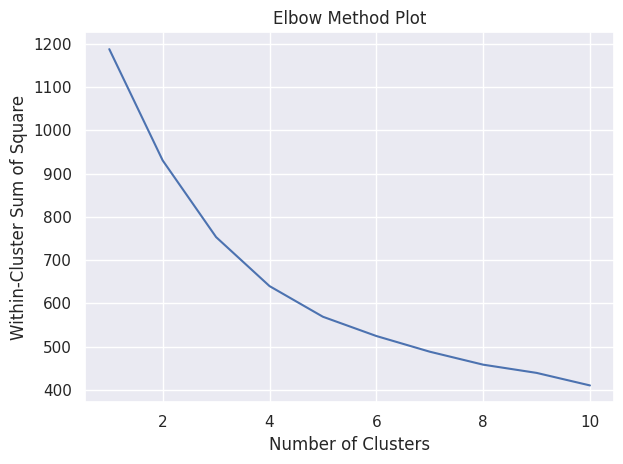

In [49]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10,random_state = 0)
    kmeans.fit(dfe_scaled)
    wcss.append(kmeans.inertia_)
sns.set_style("darkgrid")
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Square') # Within cluster sum of squares
plt.tight_layout()
plt.show()

In [50]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',
                    max_iter = 300, n_init = 10,random_state = 42)
kmeans.fit(dfe_scaled)


KMeans(n_clusters=4, n_init=10, random_state=42)

In [51]:
y = kmeans.predict(dfe_scaled)
y_df = pd.DataFrame(y,columns=['Class'])
final_data = pd.concat([df,y_df],axis=1)
final_data

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,EV_Price,Class
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,0
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,3
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,1
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,3
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000,0
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000,2
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000,1
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000,2


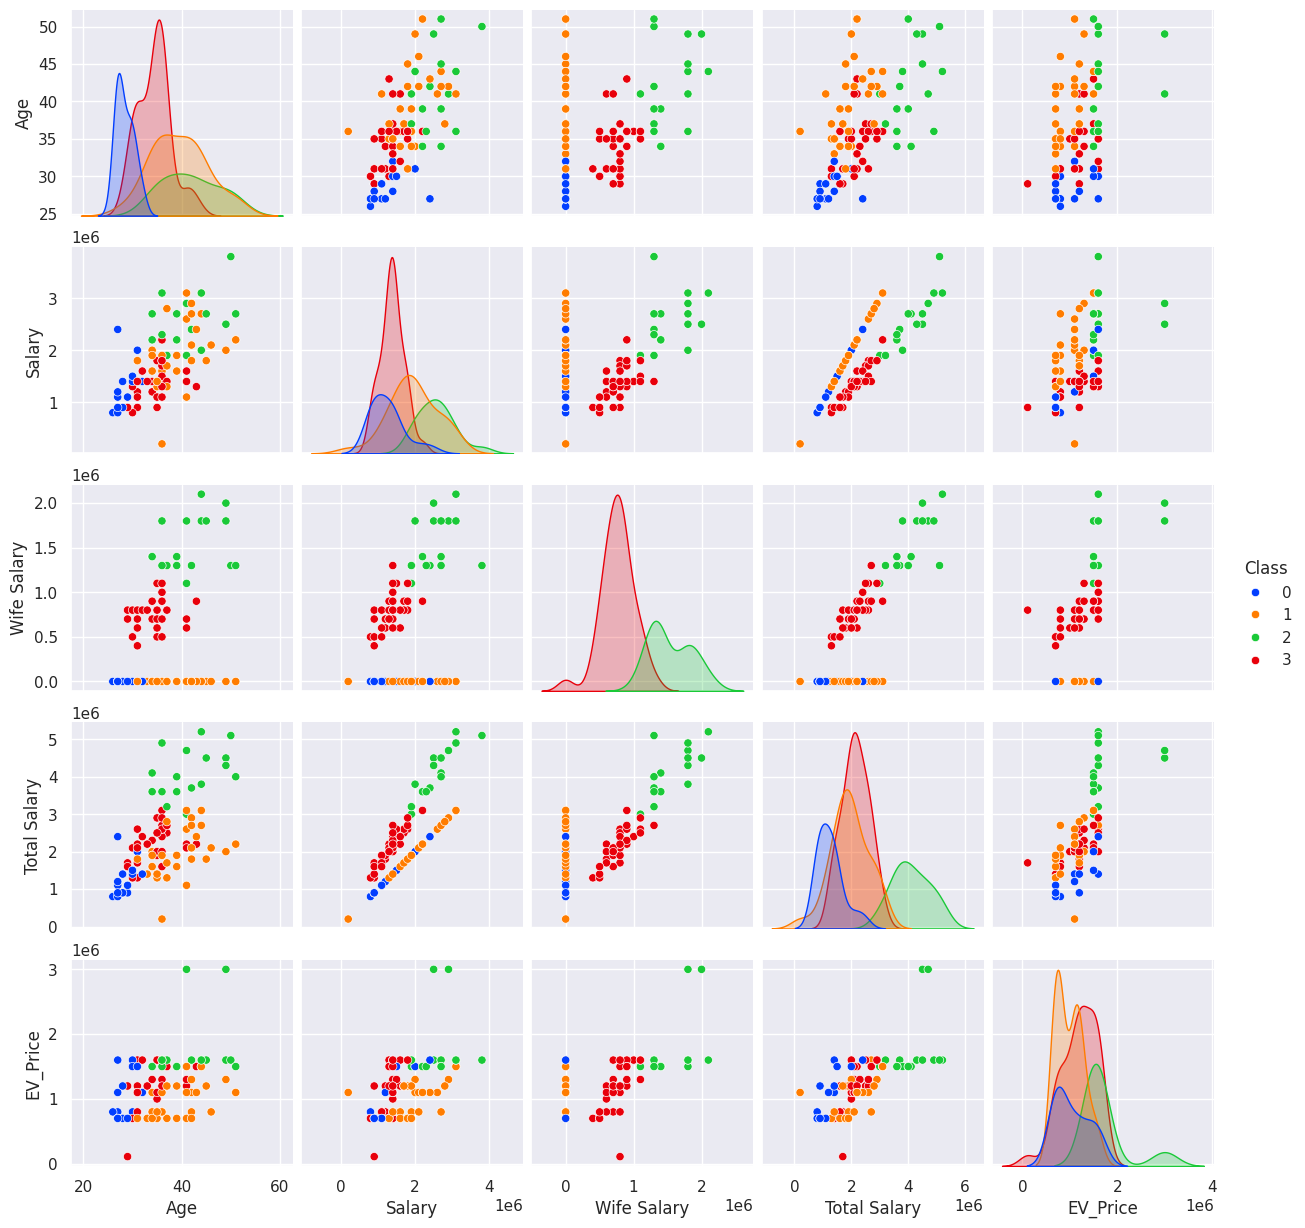

In [55]:
sns.pairplot(final_data,x_vars = ['Age','Salary', 'Wife Salary','Total Salary','EV_Price'], y_vars = ['Age','Salary', 'Wife Salary','Total Salary','EV_Price'], hue='Class', palette= 'bright')


In [56]:

#k = 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                    max_iter = 300, n_init = 10,random_state = 42)
kmeans.fit(dfe_scaled)


KMeans(n_clusters=3, n_init=10, random_state=42)

In [57]:

y = kmeans.predict(dfe_scaled)
y_df = pd.DataFrame(y,columns=['Class'])
final_data = pd.concat([df,y_df],axis=1)

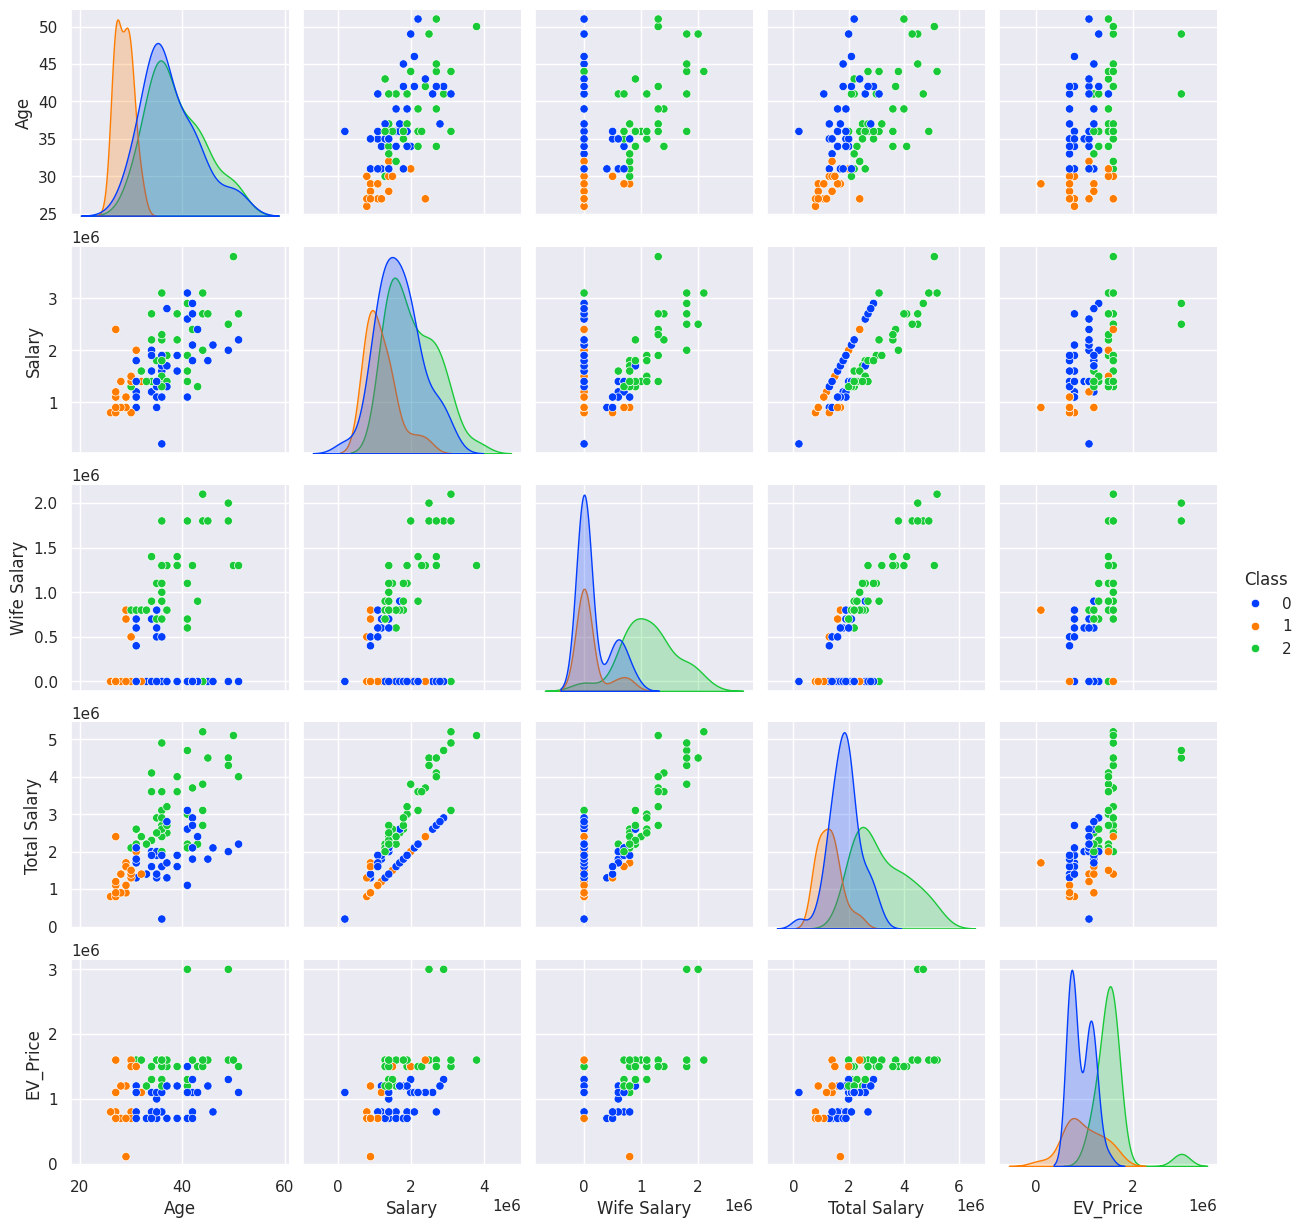

In [58]:
sns.pairplot(final_data,x_vars = ['Age','Salary', 'Wife Salary','Total Salary','EV_Price'], y_vars = ['Age','Salary', 'Wife Salary','Total Salary','EV_Price'], hue='Class', palette= 'bright')



Thus, we see that we can get a more meaningful analysis for k = 3 Let's see the characteristics of every cluster:

**Cluster 1** (Orange): Prefer low to moderately priced Electric vehicles

Age group 20-30
Moderate to average salary
Wife's salary - Low

**Cluster 2** (green) : Prefer low to moderately priced Electric vehicles

Age group 30-45
Average to high salary
Wife's salary - low to

**Cluster 3 (Blue)** : Prefer moderate priced Electric vehicles and experiment with the high priced segment.

Age group 30-45
Average to very high
Wife's salary - high


**Notable findings:**

Moderately priced EVs are the most preferred across all the classes/clusters.

Most purchasing acitivity is seen in the age range of 26-38.

Regardless of even high salaries, average to low price-ranged cars are being preferred.

Personal and home loans do not seem to have any significant impact on EV purchasing patterns.

We see the people buying over a range of prices when it comes to Verna, whereas in case of other brands, probably some specefic models are being preferred.

We observe high correlation between total salary (salary + wife salary) and price.

**Additional analysis**

In [68]:
from google.colab import files
uploaded = files.upload()

Saving EV Maker by Place.csv to EV Maker by Place.csv


In [72]:
import pandas as pd

# Load CSV file
df1 = pd.read_csv('EV Maker by Place.csv')

# Clean column names (remove leading/trailing spaces)
df1.columns = df1.columns.str.strip()

# Convert price to INR (10e3)
if 'PriceEuro' in df1.columns:
    df1['inr(10e3)'] = pd.to_numeric(df1['PriceEuro'], errors='coerce') * 0.08320

# Replace 'RapidCharge' values
if 'RapidCharge' in df1.columns:
    df1['RapidCharge'] = df1['RapidCharge'].replace({'No': 0, 'Yes': 1})

# Show first few rows
print(df1.head())


            EV Maker        Place        State
0        Tata Motors         Pune  Maharashtra
1  Mahindra Electric    Bengaluru    Karnataka
2       Ather Energy    Bengaluru    Karnataka
3      Hero Electric    New Delhi        Delhi
4       Ola Electric  Krishnagiri   Tamil Nadu


In [73]:

df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EV Maker  62 non-null     object
 1   Place     62 non-null     object
 2   State     62 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


In [74]:


df1.isna().sum()

,0
EV Maker,0
Place,0
State,0


In [77]:
print(df1.columns)


Index(['EV Maker', 'Place', 'State'], dtype='object')


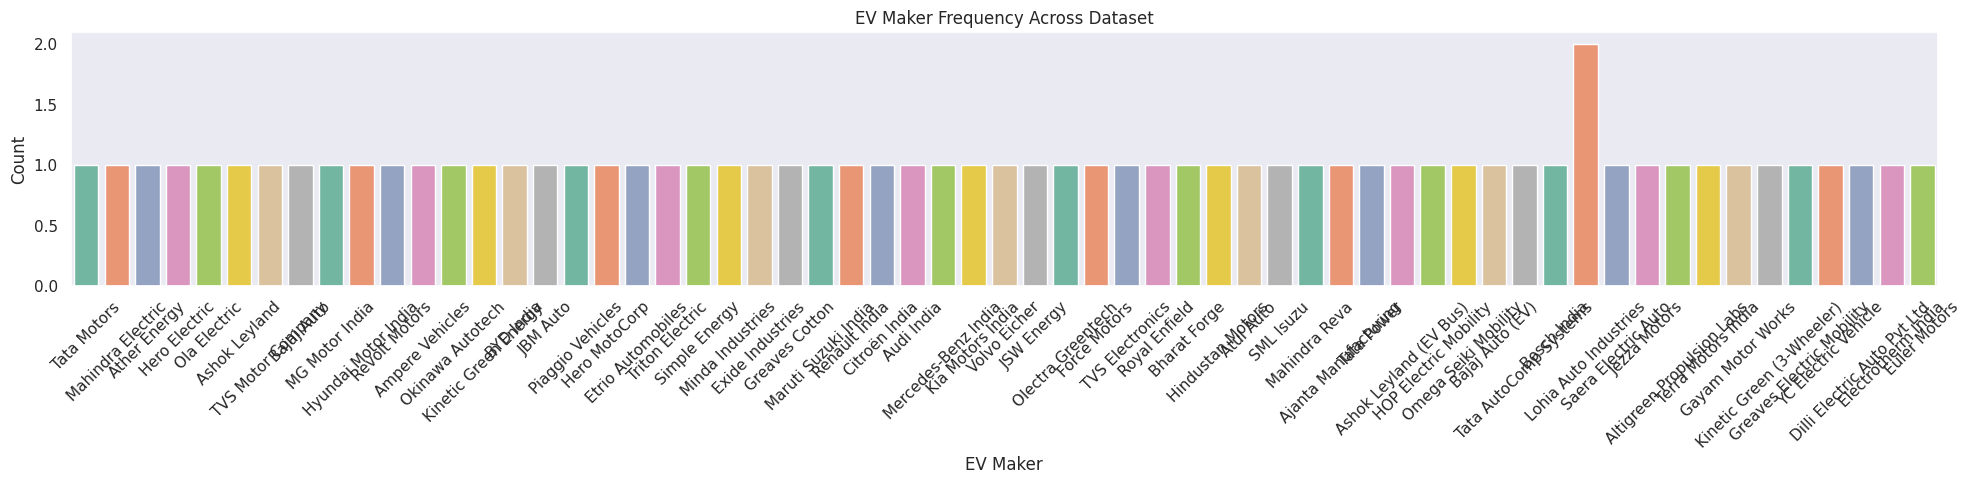

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,5))
sns.countplot(x='EV Maker', data=df1, palette='Set2')
plt.grid(axis='y')
plt.title('EV Maker Frequency Across Dataset')
plt.xlabel('EV Maker')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


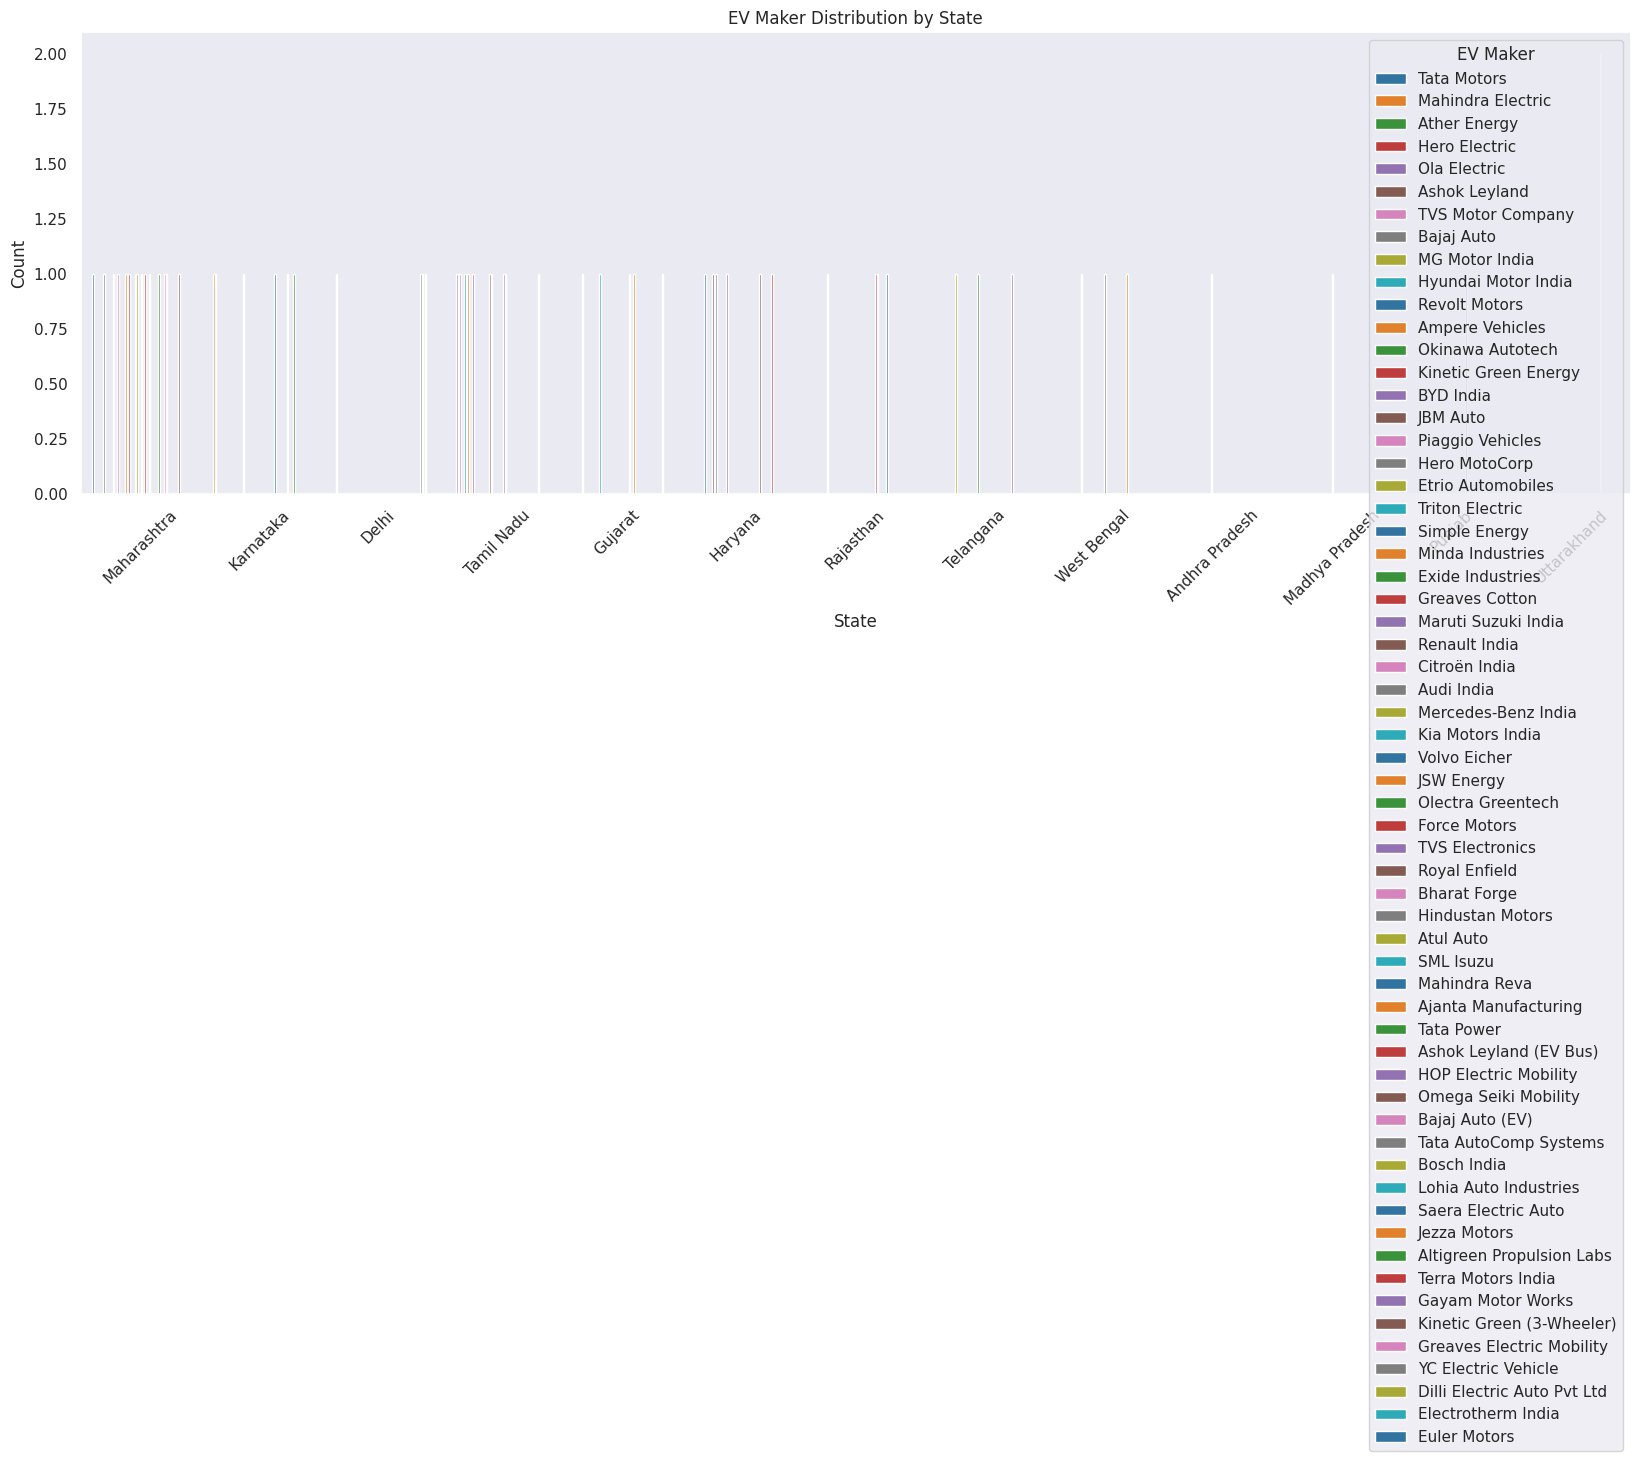

In [80]:
plt.figure(figsize=(20,6))
sns.countplot(x='State', hue='EV Maker', data=df1, palette='tab10')
plt.title('EV Maker Distribution by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()
